In [1]:
import pandas as pd
import numpy as np

In [2]:
weather_file_path = '../../vmlab/data/environment/smartis_lingne_paradis_01.2002_01.2008.csv'

weather_hourly_df = pd.read_csv(
    weather_file_path,
    sep=';',
    parse_dates=['Jour'],
    dayfirst=True,
    usecols=['Jour', 'tm', 'glot', 'um']
).rename(
    columns={'Jour': 'DATETIME', 'tm': 'TM', 'glot': 'GR', 'um': 'RH'},
    inplace=False
).set_index('DATETIME', inplace=False).astype(np.float32)

# smartis may have nans
weather_hourly_df_filled = weather_hourly_df.fillna(inplace=False, method='backfill')

weather_daily_df = pd.DataFrame({
    'TM': weather_hourly_df['TM'].groupby(pd.Grouper(freq="1D")).mean(),
    'GR': weather_hourly_df['GR'].groupby(pd.Grouper(freq="1D")).mean(),
    'RH': weather_hourly_df['RH'].groupby(pd.Grouper(freq="1D")).mean()
}).astype(np.float32)

<AxesSubplot:xlabel='DATETIME'>

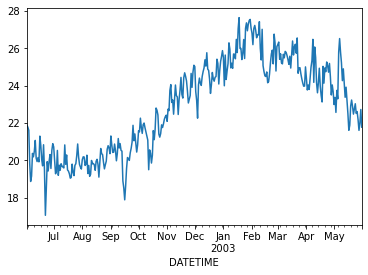

In [3]:
weather_daily_df[(weather_daily_df.index > '2002-06-01') & (weather_daily_df.index < '2003-06-01')]['TM'] .plot()